In [13]:
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm



from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Moyenne = 9.429606262517012
Écart-type = 4.271136639678794


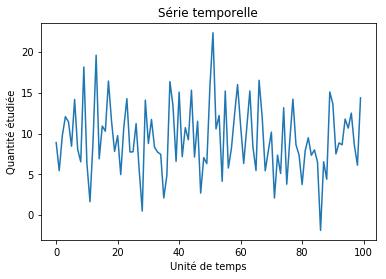

In [1]:
# Import des modules utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Génération de série aléatoire
# On génère une série de 100 nombres ayant pour moyenne 10 et pour écart-type 5
distrib = np.random.randn(100)*5+10

# On construit la série en fournissant distrib au constructeur Series
st = pd.Series(distrib)
print("Moyenne = {}".format(st.mean()))
print("Écart-type = {}".format(st.std()))

# Graph
plt.plot(st)
plt.xlabel("Unité de temps")
plt.ylabel("Quantité étudiée")
plt.title("Série temporelle")
plt.show()

In [3]:
Input=pd.read_csv('TrainData4.csv')
Input.head()

,TIMESTAMP,POWER,U10,V10,U100,V100
0,20150101 00:00,NaN,NaN,NaN,NaN,NaN
1,20150101 01:00,NaN,6.24102,3.49613,9.73707,4.78492
2,20150101 02:00,NaN,5.62234,4.06239,8.94497,5.71768
3,20150101 03:00,0.666693,5.99531,4.89334,9.52143,6.99094
4,20150101 04:00,NaN,6.90809,4.79099,10.63280,6.75417


In [34]:
Input=Input.dropna(subset=['POWER'])
Input=Input.reset_index()

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

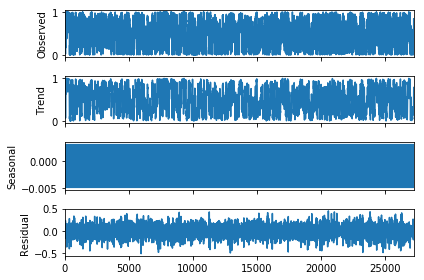

In [37]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = Input['POWER']
result = seasonal_decompose(series, model='additive', freq=10)
result.plot()
pyplot.show()

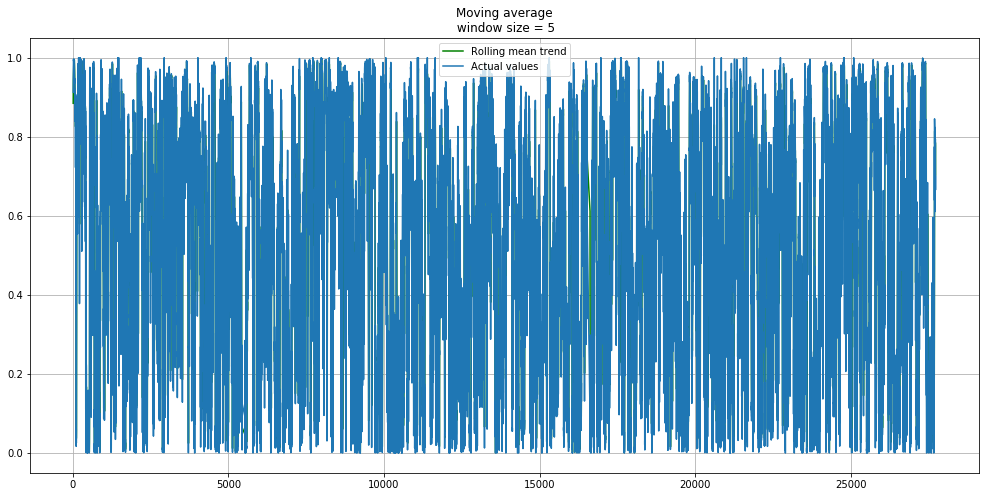

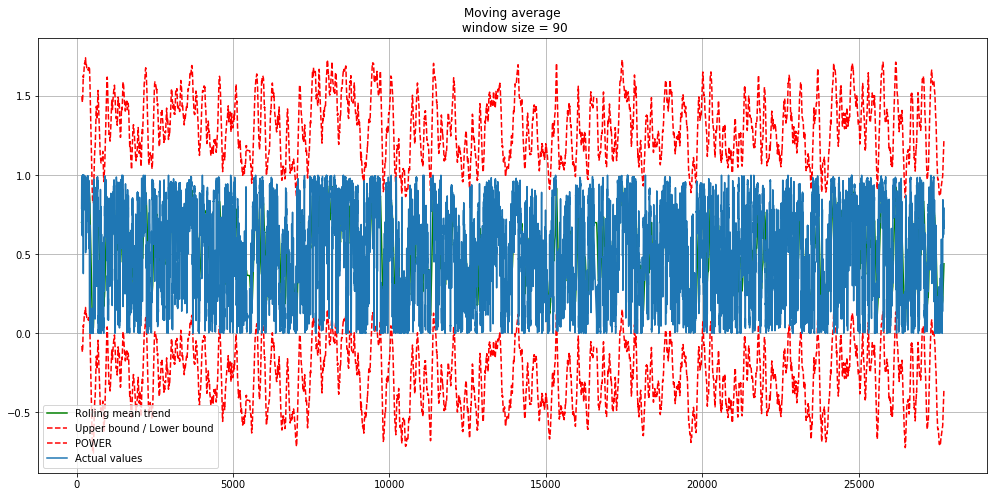

In [16]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(series, 5)



plt.show()

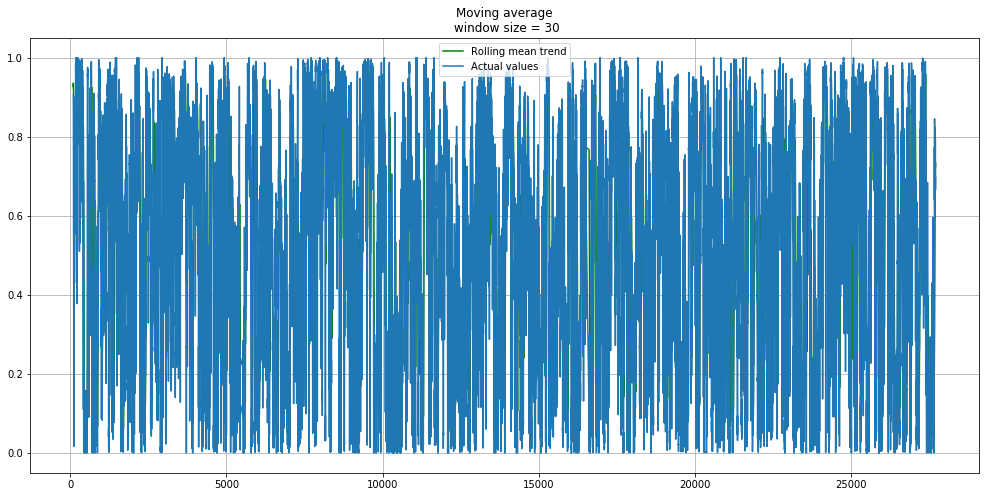

In [17]:
#Smooth by the previous month (30 days)
plot_moving_average(series, 30)
plt.show()

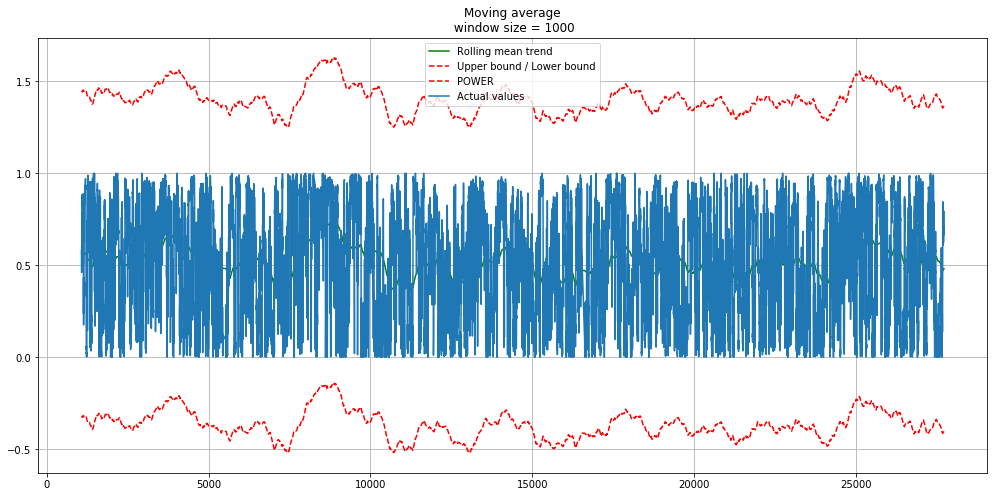

In [23]:
#Smooth by previous quarter (90 days)
plot_moving_average(series, 1000, plot_intervals=True)
plt.show()

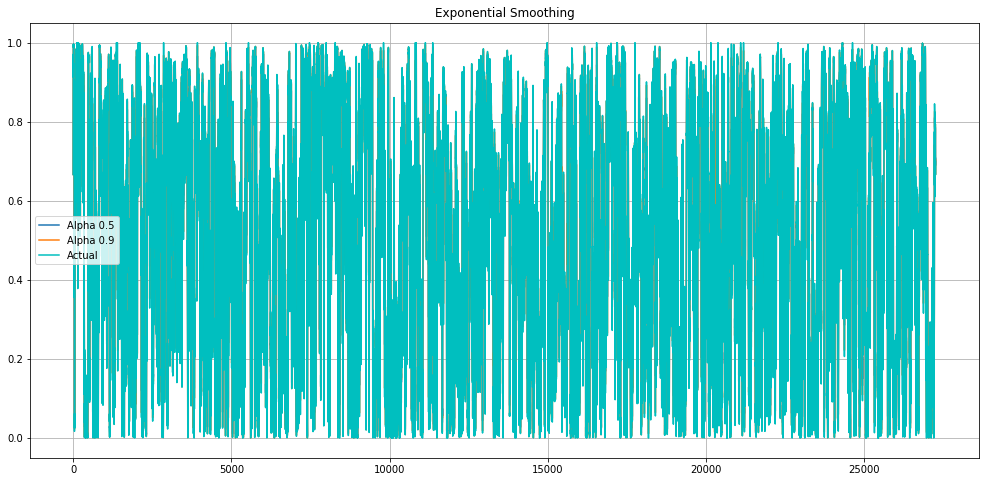

In [42]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(series, [0.5, 0.9])
plt.show()

3        0.666693
6        0.937501
9        0.935002
12       0.912940
15       0.971080
18       0.912379
21       0.991278
24       0.995323
27       0.993120
30       0.995830
33       0.987268
36       0.995432
39       0.996321
42       0.991100
45       0.991618
48       0.995594
51       0.994633
54       0.963748
57       0.948927
60       0.941353
63       0.935847
66       0.936056
69       0.946751
72       0.915225
75       0.849586
78       0.839224
81       0.919982
84       0.887479
87       0.759194
90       0.722167
           ...   
27690    0.828417
27691    0.782647
27692    0.813933
27693    0.812577
27694    0.823762
27695    0.715721
27696    0.668081
27697    0.610382
27698    0.648472
27699    0.627074
27700    0.691780
27701    0.717253
27702    0.674971
27703    0.674943
27704    0.687157
27705    0.667963
27706    0.625025
27707    0.712110
27708    0.731418
27709    0.774156
27710    0.781752
27711    0.791411
27712    0.794706
27713    0.784537
27714    0